In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# ensemble 위한 분류학습기 추가하기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import load_breast_cancer

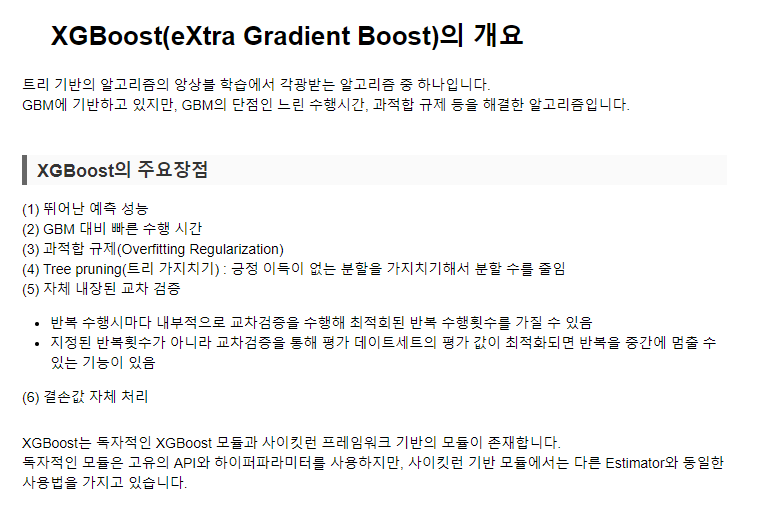

In [2]:
from IPython.display import Image
Image('./images/XGBoost-01.png')

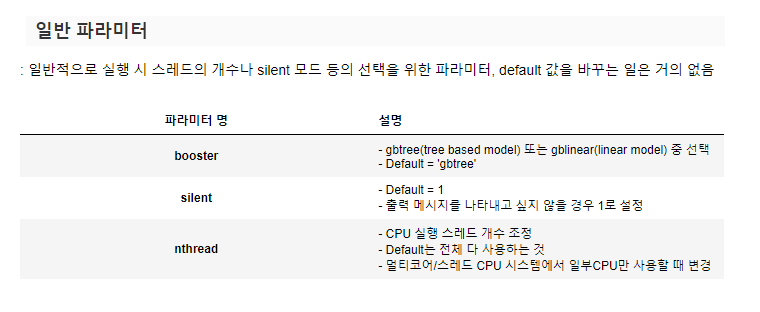

In [3]:
Image('./images/XGBoost-02.png')

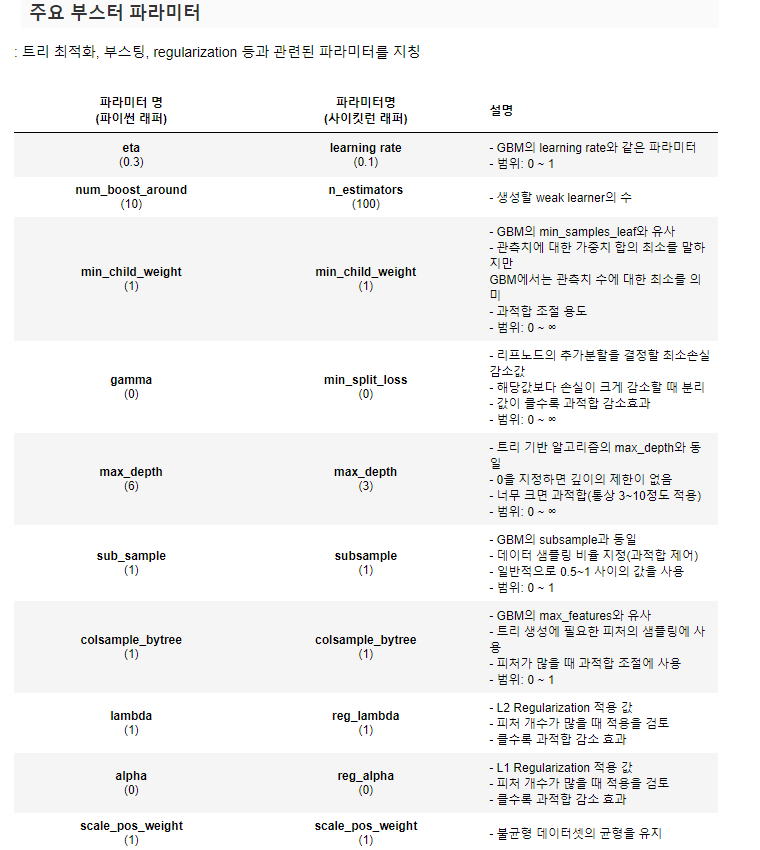

In [4]:
Image('./images/XGBoost-03.png')

In [5]:
dataset = load_breast_cancer()

#dataset.keys()
features = dataset.data
# features
label = dataset.target
#label
cancer_df = pd.DataFrame(data=features,columns=dataset.feature_names)
cancer_df['target'] = label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features,label,
                                                   test_size=0.2,
                                                   random_state=100)


- sklearn XGBoost 적용

In [8]:
from xgboost import XGBClassifier

In [9]:
sklearn_xgboost_model = XGBClassifier(n_estimators=400,
                                     learning_rate=0.1,
                                     max_depth=3) 
# learning_rate 값을 줄이면 n_estimators는 늘어나야 한다
sklearn_xgboost_model.fit(X_train,y_train)

XGBClassifier(n_estimators=400)

In [10]:
y_pred = sklearn_xgboost_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [11]:
# 하이퍼파라미터 튜닝을 이용한 예측 정확도를 실습해 보세요!!!
# 혼동행렬, 정확도, 정밀도, 재현율, F1 , AUC 확인까지

def classifier_eval(y_test , y_pred) :
    print('오차행렬 : \n' , confusion_matrix(y_test, y_pred))
    print('정확도   : ' , accuracy_score(y_test, y_pred))
    print('정밀도   : ' , precision_score(y_test, y_pred))
    print('재현율   : ' , recall_score(y_test, y_pred))
    print('F1       : ' , f1_score(y_test, y_pred))
    print('AUC      : ' , roc_auc_score(y_test, y_pred))


In [12]:
classifier_eval(y_test,y_pred)

오차행렬 : 
 [[46  3]
 [ 1 64]]
정확도   :  0.9649122807017544
정밀도   :  0.9552238805970149
재현율   :  0.9846153846153847
F1       :  0.9696969696969696
AUC      :  0.9616954474097332


In [13]:
# 튜닝
sklearn_xgboost_model = XGBClassifier(n_estimators=400,
                                     learning_rate=0.1,
                                     max_depth=3) 

# early_stopping_rounds=100 반복
# logloss -> 오류에 대한 평가성능지표 리턴 함수
sklearn_xgboost_model.fit(X_train,y_train,early_stopping_rounds=100,
                         eval_metric='logloss',
                         eval_set = [(X_test,y_test)],
                         verbose = True)

[0]	validation_0-logloss:0.614598
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.554049
[2]	validation_0-logloss:0.498159
[3]	validation_0-logloss:0.448575
[4]	validation_0-logloss:0.40558
[5]	validation_0-logloss:0.372269
[6]	validation_0-logloss:0.341755
[7]	validation_0-logloss:0.316994
[8]	validation_0-logloss:0.291993
[9]	validation_0-logloss:0.273857
[10]	validation_0-logloss:0.254903
[11]	validation_0-logloss:0.238183
[12]	validation_0-logloss:0.225766
[13]	validation_0-logloss:0.212247
[14]	validation_0-logloss:0.201563
[15]	validation_0-logloss:0.192508
[16]	validation_0-logloss:0.182921
[17]	validation_0-logloss:0.176626
[18]	validation_0-logloss:0.170079
[19]	validation_0-logloss:0.162605
[20]	validation_0-logloss:0.157468
[21]	validation_0-logloss:0.152077
[22]	validation_0-logloss:0.148772
[23]	validation_0-logloss:0.146092
[24]	validation_0-logloss:0.144648
[25]	validation_0-logloss:0.142152
[26]	validation_0-logloss:0.1382

[230]	validation_0-logloss:0.092862
[231]	validation_0-logloss:0.092728
[232]	validation_0-logloss:0.092912
[233]	validation_0-logloss:0.093167
[234]	validation_0-logloss:0.093077
[235]	validation_0-logloss:0.093222
[236]	validation_0-logloss:0.093081
[237]	validation_0-logloss:0.092917
[238]	validation_0-logloss:0.093048
[239]	validation_0-logloss:0.092915
[240]	validation_0-logloss:0.093164
[241]	validation_0-logloss:0.093007
[242]	validation_0-logloss:0.092866
[243]	validation_0-logloss:0.093008
[244]	validation_0-logloss:0.092919
[245]	validation_0-logloss:0.092919
Stopping. Best iteration:
[145]	validation_0-logloss:0.092488



XGBClassifier(n_estimators=400)

In [14]:
y_pred145 = sklearn_xgboost_model.predict(X_test)
classifier_eval(y_test,y_pred145)

오차행렬 : 
 [[47  2]
 [ 1 64]]
정확도   :  0.9736842105263158
정밀도   :  0.9696969696969697
재현율   :  0.9846153846153847
F1       :  0.9770992366412214
AUC      :  0.9718995290423862


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

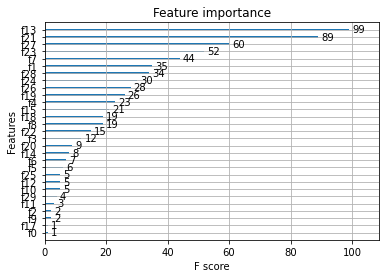

In [15]:
# 피처 중요도 시각화
from xgboost import plot_importance

plot_importance(sklearn_xgboost_model)

## 스태킹 알고리즘

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
# 개별 분류기 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100,random_state=100)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

In [26]:
# 개별 모델에 대한 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train,y_train)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [27]:
# 개별 모델에 대한 예측을 수행
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

In [29]:
classifier_eval(y_test,knn_pred)
classifier_eval(y_test,rf_pred)
classifier_eval(y_test,dt_pred)
classifier_eval(y_test,ada_pred)

오차행렬 : 
 [[48  1]
 [ 5 60]]
정확도   :  0.9473684210526315
정밀도   :  0.9836065573770492
재현율   :  0.9230769230769231
F1       :  0.9523809523809524
AUC      :  0.9513343799058084
오차행렬 : 
 [[45  4]
 [ 1 64]]
정확도   :  0.956140350877193
정밀도   :  0.9411764705882353
재현율   :  0.9846153846153847
F1       :  0.962406015037594
AUC      :  0.95149136577708
오차행렬 : 
 [[46  3]
 [ 3 62]]
정확도   :  0.9473684210526315
정밀도   :  0.9538461538461539
재현율   :  0.9538461538461539
F1       :  0.9538461538461539
AUC      :  0.9463108320251179
오차행렬 : 
 [[46  3]
 [ 1 64]]
정확도   :  0.9649122807017544
정밀도   :  0.9552238805970149
재현율   :  0.9846153846153847
F1       :  0.9696969696969696
AUC      :  0.9616954474097332


In [30]:
# 학습을 마친 모델의 예측결과를 합쳐서 최종 예측
merge_pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])
merge_pred

array([[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [31]:
merge_pred = np.transpose(merge_pred)
#merge_pred

In [52]:
# 최종 분류기 선택 MetaModel 만들어보기
lr_clf = LogisticRegression()
lr_clf.fit(merge_pred,y_test)
final_pred = lr_clf.predict(merge_pred)
classifier_eval(y_test,final_pred)

오차행렬 : 
 [[48  1]
 [ 1 64]]
정확도   :  0.9824561403508771
정밀도   :  0.9846153846153847
재현율   :  0.9846153846153847
F1       :  0.9846153846153847
AUC      :  0.9821036106750393


In [46]:
# 과적합(overfitting)을 보안하기 위해서 교차검증을 추가해야한다
# cv 세트를 기반으로 코드를 변경
# 회귀모델의 평가지표로 활용되는 -> MAE(Mean of Absolute Errors)
# 실제값과 예측값의 차이를 절대값으로 변환된 평균

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error


In [47]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean



In [48]:
# cv 적용 모델의 데이터 세트 리턴 
knn_train, knn_test = get_stacking_base_datasets(knn_clf,X_train,y_train,X_test,5)
rf_train, rf_test = get_stacking_base_datasets(rf_clf,X_train,y_train,X_test,5)
dt_train, dt_test = get_stacking_base_datasets(dt_clf,X_train,y_train,X_test,5)
ada_train, ada_test = get_stacking_base_datasets(ada_clf,X_train,y_train,X_test,5)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [49]:
stacking_train = np.concatenate((knn_train,rf_train,dt_train,ada_train),axis=1)
stacking_test = np.concatenate((knn_test,rf_test,dt_test,ada_test),axis=1)

In [50]:
# 메타 모델 학습
lr_clf.fit(stacking_train, y_train)
stacking_pred = lr_clf.predict(stacking_test)
classifier_eval(y_test,stacking_pred)

오차행렬 : 
 [[48  1]
 [ 1 64]]
정확도   :  0.9824561403508771
정밀도   :  0.9846153846153847
재현율   :  0.9846153846153847
F1       :  0.9846153846153847
AUC      :  0.9821036106750393
